# Лабораторная работа 4
## Часть 1
### Задание 1

In [1]:
import numpy as np
from numpy.linalg import norm
from numpy import arccos, dot, pi, cross
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

In [2]:
A = 10
q = 0.3
r = 0.5
dist = 3
point_list = np.array

In [3]:
def plot_circle(x, y, r):
    angles = np.linspace(0, 2*pi, 50)
    x_cir = x + r*np.cos(angles)
    y_cir = y + r*np.sin(angles)
    plt.plot(x_cir, y_cir, 'r')

In [4]:
def poisson_process(lamb, area_size):
    number_block = np.random.poisson(lamb*area_size**2)
    x = np.random.uniform(0, area_size, size=number_block)
    y = np.random.uniform(0, area_size, size=number_block)
    return x, y

In [5]:
def coords_rectangle(x1, y1, x2, y2, angle):
    difference_angle = 2 * pi - angle
    reverse_angle = pi / 2 - difference_angle
    opposite_angle = reverse_angle + pi
    x1_rectangle = x1 + r * np.cos(opposite_angle)
    y1_rectangle = y1 + r * np.sin(opposite_angle)
    x2_rectangle = x1 + r * np.cos(reverse_angle)
    y2_rectangle = y1 + r * np.sin(reverse_angle)
    x3_rectangle = x2 + r * np.cos(reverse_angle)
    y3_rectangle = y2 + r * np.sin(reverse_angle)
    x4_rectangle = x2 + r * np.cos(opposite_angle)
    y4_rectangle = y2 + r * np.sin(opposite_angle)
    
    return x1_rectangle, y1_rectangle, x2_rectangle, y2_rectangle, x3_rectangle, y3_rectangle, x4_rectangle, y4_rectangle

In [6]:
def check_dist(a, b, c):
    ca = (c - a) / norm(c - a)
    ba = (b - a) / norm(b - a)
    cb = (c - b) / norm(c - b)
    ab = (a - b) / norm(a - b)
    
    if arccos(dot(ca, ba)) > 1:
        return norm(c - a)
    if arccos(dot(cb, ab)) > 1:
        return norm(c - b)
    return norm(cross(a - b, a - c)) / norm(b - a)

In [7]:
def check_intersection():
    circle_point  = []
    point1 = []
    point2 = []
    point1.extend([x1, y1])
    point2.extend([x2, y2])
    for i in range(len(x)):
        circle_point.append([x[i], y[i]])
    for i in range(len(x)):
        if (np.round(check_dist(point_list(point1), point_list(point2), point_list(circle_point[i])), 1) <= r):
            return True

In [8]:
x, y = poisson_process(q, A)
angle = np.random.uniform(0, 2*np.pi)
x1,y1 = np.random.uniform(dist, A - dist), np.random.uniform(dist, A - dist)
x2 = x1 + dist * np.cos(angle)
y2 = y1 + dist * np.sin(angle)
x1_rect, y1_rect, x2_rect, y2_rect, x3_rect, y3_rect, x4_rect, y4_rect = coords_rectangle(x1,y1,x2,y2,angle)

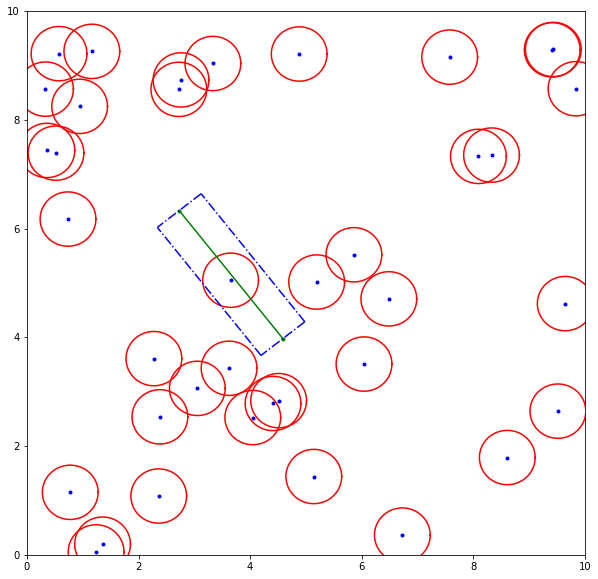

In [9]:
plt.figure(figsize=(10, 10))
plt.plot(x, y, ".b")
for i in range(len(x)):
    plot_circle(x[i], y[i], r)
plt.plot([x1, x2], [y1, y2], '.-g')
plt.plot([x1_rect, x2_rect], [y1_rect, y2_rect], '-.b')
plt.plot([x1_rect, x4_rect], [y1_rect, y4_rect], '-.b')
plt.plot([x2_rect, x3_rect], [y2_rect, y3_rect], '-.b')
plt.plot([x4_rect, x3_rect], [y4_rect, y3_rect], '-.b')
plt.xlim(0, A)
plt.ylim(0, A)
plt.show()

In [10]:
if check_intersection():
    print("Blocked")
else:
    print("Not blocked")

Blocked


In [11]:
N = 1000

In [12]:
# Вероятность на основе 1000 реализаций
summ = 0

for i in range(N):
    x, y = poisson_process(q, A)
    angle = np.random.uniform(0, 2*np.pi)
    # x1,y1 = np.random.uniform(dist, A - dist), np.random.uniform(dist, A - dist)
    x1,y1 = np.random.uniform(0, A), np.random.uniform(0, A)
    x2 = x1 + dist * np.cos(angle)
    y2 = y1 + dist * np.sin(angle)
    if check_intersection():
        summ += 1
print("Вероятность блокировки: ", summ/N)

Вероятность блокировки:  0.587


In [13]:
# Теоретическая вероятность блокировки
S = 2 * r * dist
lmb = q * S
probability = 1 - np.exp(-lmb)
print("Вероятность блокировки: ", probability)

Вероятность блокировки:  0.5934303402594008
